In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [2]:
features_num = 3
num = 220

In [3]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)
print(Train_dataset)

X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0]



[[0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01457726 0.         0.        ]
 [0.01749271 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02623907 0.         0.        ]
 [0.02040816 0.         0.  

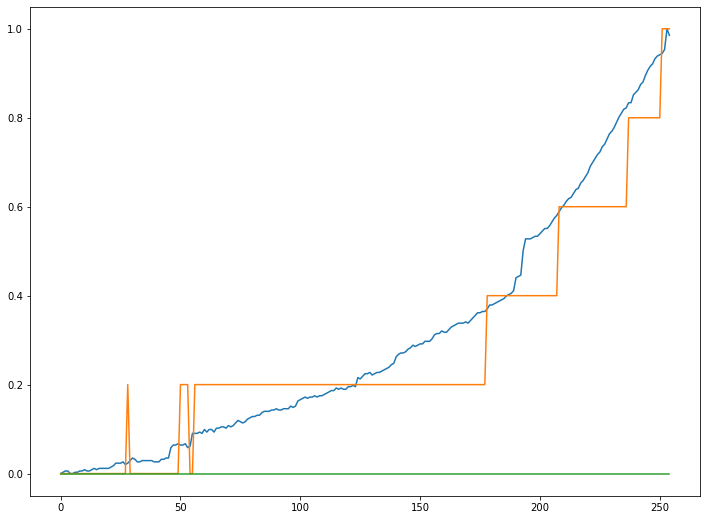

In [4]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [5]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [6]:
train_feature, train_label = make_dataset(X_train, Y_train, 10)

In [7]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 10)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(248, 10, 3) (248,)


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(196, 10, 3) (49, 10, 3)


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(32,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [10]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.01),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [11]:
history = model.fit(x_train, y_train,
                                    epochs=50,
                                    batch_size=5, steps_per_epoch=200,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[checkpoint])

Epoch 1/50
200/200 [==============================] - 5s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0582 - val_loss: 1.1370e-04 - val_mean_absolute_error: 0.0087

Epoch 00001: val_loss improved from inf to 0.00011, saving model to models\tmp_checkpointcell7_GRU.h5
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 1.4357e-04 - mean_absolute_error: 0.0088 - val_loss: 1.9423e-04 - val_mean_absolute_error: 0.0121

Epoch 00002: val_loss did not improve from 0.00011
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 2.1409e-04 - mean_absolute_error: 0.0098 - val_loss: 1.7072e-04 - val_mean_absolute_error: 0.0092

Epoch 00003: val_loss did not improve from 0.00011
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 1.9963e-04 - mean_absolute_error: 0.0101 - val_loss: 6.5109e-04 - val_mean_absolute_error: 0.0185

Epoch 00004: val_loss did not improve from 0.00011
Epoch 5/50
200/200 [==============================] - 1s

In [12]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[0.13031703]
 [0.15032676]
 [0.15756418]
 [0.18694757]
 [0.18586625]
 [0.1392471 ]
 [0.15458371]
 [0.13538545]
 [0.18038414]
 [0.17031007]
 [0.18124257]
 [0.18596958]
 [0.15274976]
 [0.18972005]
 [0.1407441 ]
 [0.13244194]
 [0.1283411 ]
 [0.14969628]
 [0.18805544]
 [0.23203033]
 [0.24693199]
 [0.25243074]
 [0.25474167]
 [0.16652177]
 [0.19577749]
 [0.20507923]
 [0.20827916]
 [0.17847061]
 [0.19949159]
 [0.20622581]
 [0.17760839]
 [0.19909976]
 [0.26779804]
 [0.2284994 ]
 [0.21645208]
 [0.18151541]
 [0.20076224]
 [0.29968145]
 [0.30040035]
 [0.3326402 ]
 [0.34269905]
 [0.33797744]
 [0.34792295]
 [0.35573608]
 [0.35323572]
 [0.3510537 ]
 [0.41262674]
 [0.39963222]
 [0.42772704]
 [0.40470853]
 [0.46170157]
 [0.5102019 ]
 [0.52482986]
 [0.5296877 ]
 [0.46786186]
 [0.45014232]
 [0.4444074 ]
 [0.47406694]
 [0.48262802]
 [0.42213777]
 [0.43594706]
 [0.40804255]
 [0.46283174]
 [0.4471711 ]
 [0.4746501 ]
 [0.51456374]
 [0.4945596 ]
 [0.5211037 ]
 [0.56075513]
 [0.50840724]
 [0.5258133 ]
 [0.53

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                3552      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


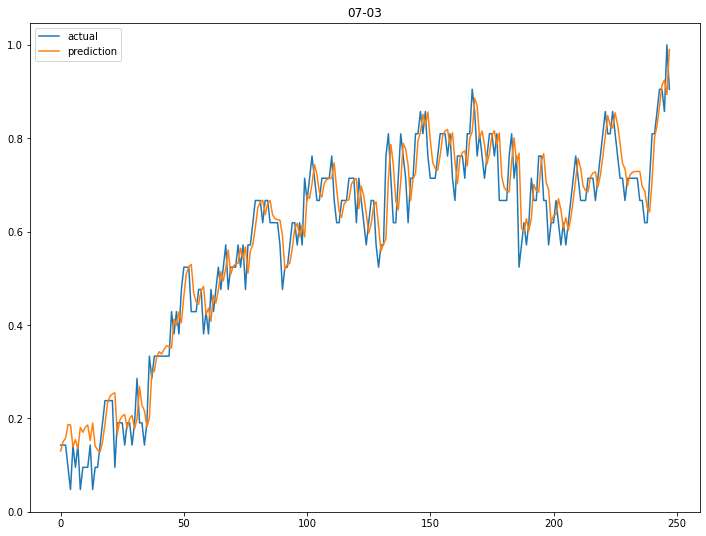

In [13]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.title('07-03')
plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

In [14]:
loop = len(test_label)
for i in range(loop):
    error_avg = 0
    error = abs((test_label[i] - pred[i])/test_label[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

[0.03796067]


In [15]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)

test_ds2 = scaler.fit_transform(test_ds2)
x_test2 = test_ds2[:, 1:4]
y_test2 = test_ds2[:, 1]

In [16]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 10)

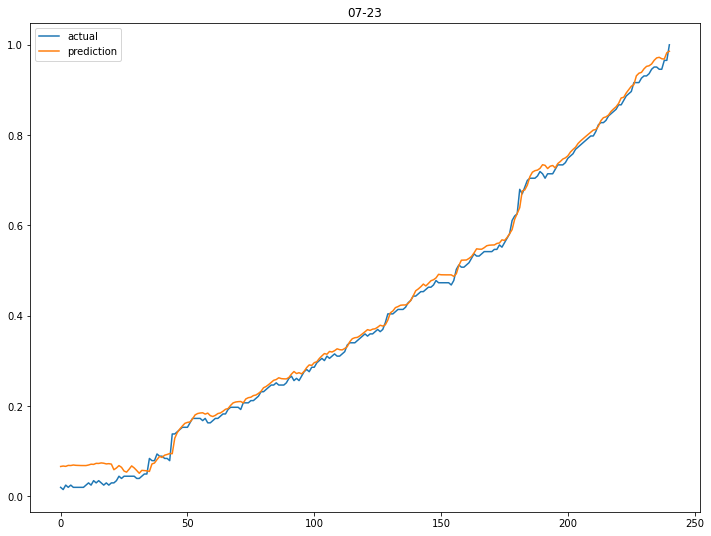

[0.00595772]


In [17]:
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2, label='actual')
plt.plot(pred2, label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()
loop = len(test_label2)
for i in range(loop):
    error_avg = 0
    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

[0.00380612]


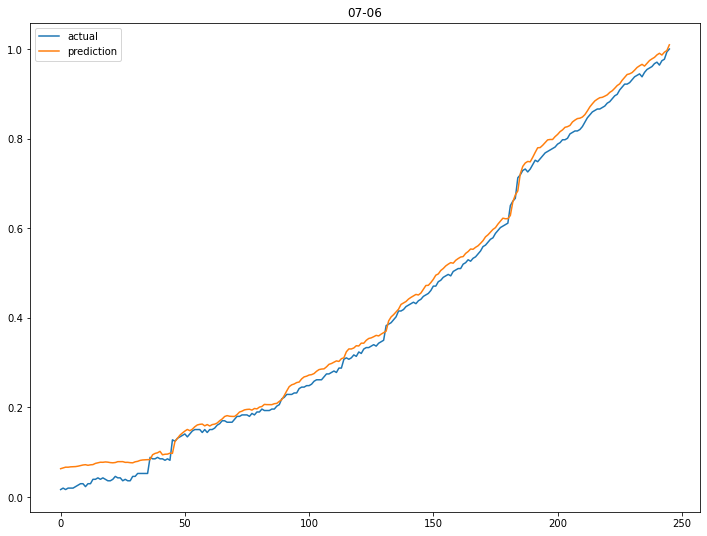

In [18]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)

test_ds3 = scaler.fit_transform(test_ds3)
x_test3 = test_ds3[:, 1:4]
y_test3 = test_ds3[:, 1]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 10)

pred3 = model.predict(test_feature3)

loop = len(test_label3)
for i in range(loop):
    error_avg = 0
    error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3, label='prediction')
plt.title('07-06')
plt.savefig('savefig/cell7/07-06.png')
plt.legend()
plt.show()


[0.01066864]


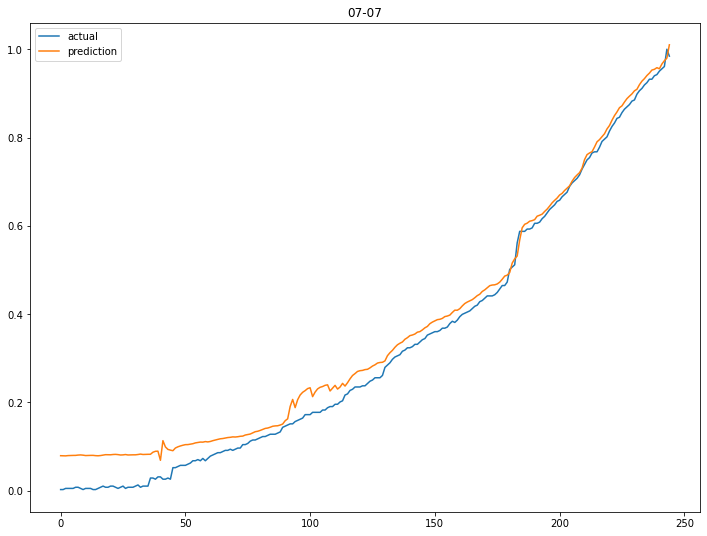

In [19]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds4 = scaler.fit_transform(test_ds4)
x_test4 = test_ds4[:, 1:4]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 10)

pred4 = model.predict(test_feature4)
loop = len(test_label4)
for i in range(loop):
    error_avg = 0
    error = abs((test_label4[i] - pred4[i])/test_label4[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.title('07-07')
plt.savefig('savefig/cell7/07-07.png')
plt.legend()
plt.show()

[0.03060476]


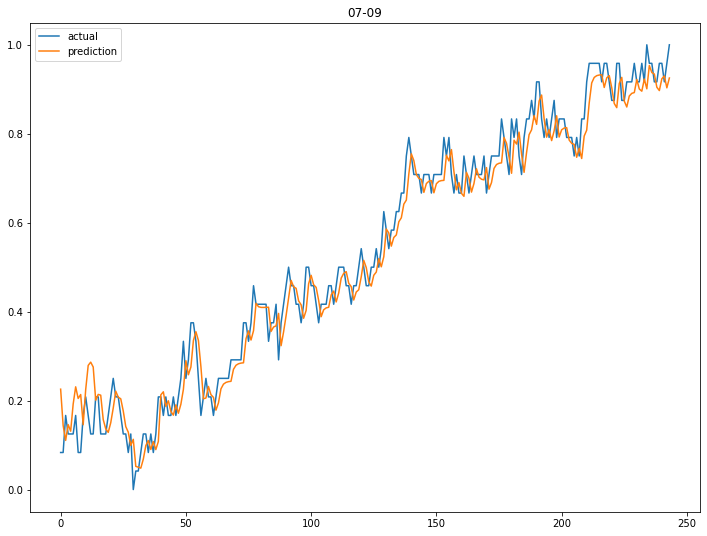

In [20]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds5 = scaler.fit_transform(test_ds5)
x_test5 = test_ds5[:, 1:4]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 10)

pred5 = model.predict(test_feature5)

loop = len(test_label5)
for i in range(loop):
    error_avg = 0
    if test_label5[i]!=0:
        error = abs((test_label5[i] - pred5[i])/test_label5[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.title('07-09')
plt.savefig('savefig/cell7/07-09.png')
plt.legend()
plt.show()

[0.00683352]


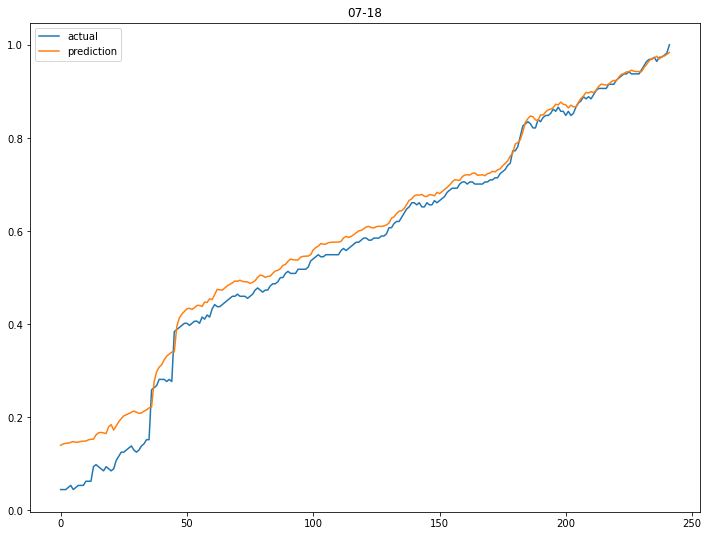

In [21]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds6 = scaler.fit_transform(test_ds6)
x_test6 = test_ds6[:, 1:4]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 10)

pred6 = model.predict(test_feature6)

loop = len(test_label6)
for i in range(loop):
    error_avg = 0
    error = abs((test_label6[i] - pred6[i])/test_label6[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.title('07-18')
plt.savefig('savefig/cell7/07-18.png')
plt.legend()
plt.show()

[0.11180115]


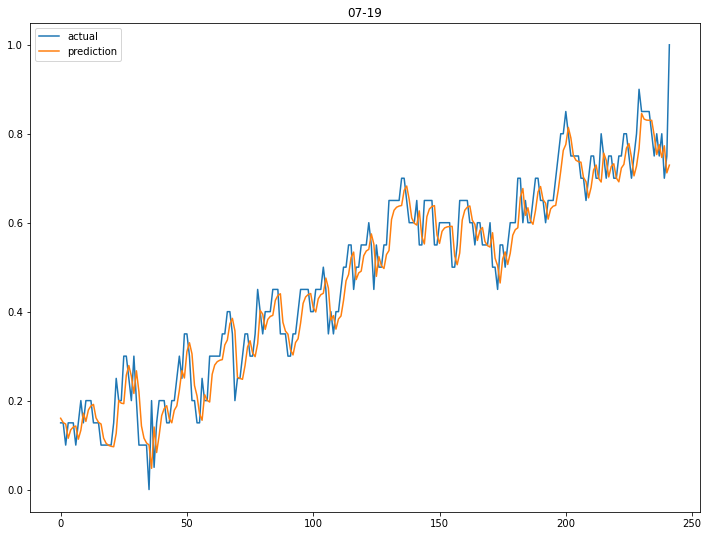

In [22]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:4]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-19')
plt.savefig('savefig/cell7/07-19.png')
plt.legend()
plt.show()

[0.00206198]


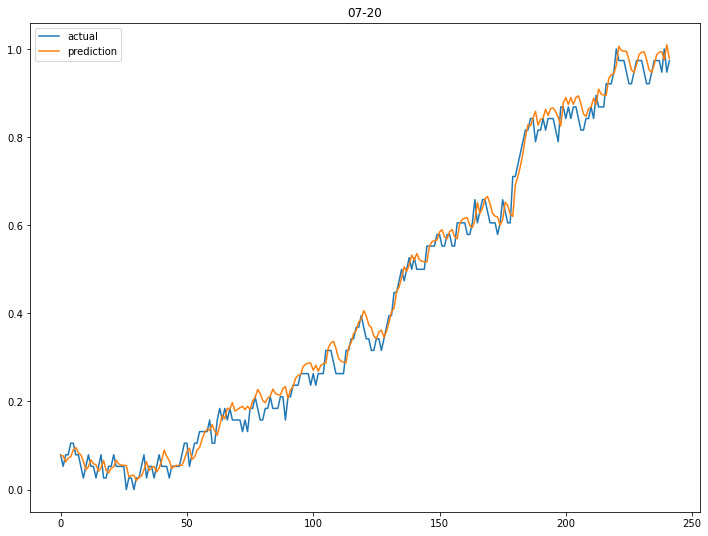

In [23]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:4]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-20')
plt.savefig('savefig/cell7/07-20.png')
plt.legend()
plt.show()

[0.00621941]


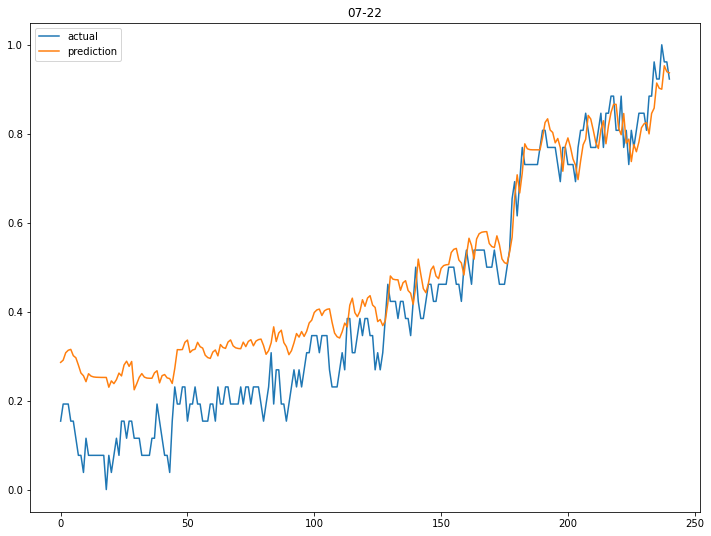

In [24]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
x_test8 = test_ds8[:, 1:4]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)

pred8 = model.predict(test_feature8)

loop = len(test_label8)
for i in range(loop):
    error_avg = 0
    if test_label8[i]!=0:
        error = abs((test_label8[i] - pred8[i])/test_label8[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.title('07-22')
plt.savefig('savefig/cell7/07-22.png')
plt.legend()
plt.show()

In [25]:
print(pred8.shape)
print(test_feature8.shape)

(241, 1)
(241, 10, 3)
